# EDA ( Exploratory Data Analysis )
by  Bayu Andrianto Wirawan & Shafwan Hanif

referensi bacaan

- https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/ Univariate, Bivariate, Multivariate
- https://python-graph-gallery.com buat seaborn,matplotlib, wordcloud
- https://python-visualization.github.io/folium/ buat folium
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html buat pandas
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html buat pandas pivot table

# GOALS

- Mendapatkan analisis data DC Properties untuk mengetahui Prediksi Harga Properties di Wasington DC
- Mendapatkan analisis tentang pemetaan resiko dari harga jual di setiap wilayah
- Mengetahui trend harga rumah

OUTPUT
- Harga rumah untuk kita beli = ```Hasil regresi``` x ```Hasil cluster resiko```
- Harga Jual Rumah = ```Hasil Regresi``` x ```Tren Harga Rumah```

## Import Package

In [574]:
import pandas as pd
import numpy as np
import statistics as st
from collections import Counter

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib
import seaborn as sns
import folium
import matplotlib.pyplot as plt

import wordcloud
import scipy
from scipy import stats

from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, classification_report, f1_score
from sklearn import metrics 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)


In [575]:
print('pandas version:', pd.__version__,'per January 2022')
print('numpy version:', np.__version__,'per January 2022')
print('folium version:', folium.__version__,'per January 2022')
print('matplotlib version:', matplotlib.__version__,'per January 2022')
print('seaborn version:', sns.__version__,'per January 2022')
print('wordcloud version:', wordcloud.__version__,'per January 2022')
print('scipy version:', scipy.__version__,'per January 2022')

pandas version: 1.3.4 per January 2022
numpy version: 1.21.4 per January 2022
folium version: 0.12.1.post1 per January 2022
matplotlib version: 3.5.0 per January 2022
seaborn version: 0.11.2 per January 2022
wordcloud version: 1.8.1 per January 2022
scipy version: 1.7.2 per January 2022


## Import Data

In [576]:
df = pd.read_csv('Data/DC_Properties.csv')

In [577]:
df.head() #menampilkan lima data teratas

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [578]:
df.tail() #menampilkan lima data terbawah

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,1938,NaN,2015-04-03 00:00:00,399900.0,Q,4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,394,2018-07-22 18:01:38,Condominium,2786.0,639.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,1938,NaN,2013-10-04 00:00:00,416000.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,506,2018-07-22 18:01:38,Condominium,2786.0,820.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,1920,NaN,2008-09-30 00:00:00,600000.0,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,467,2018-07-22 18:01:38,Condominium,2880.0,1167.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,NaN,2015-04-14 00:00:00,215100.0,Q,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,332,2018-07-22 18:01:38,Condominium,2275.0,447.0,NaN,NaN,NaN,20024.0,NaN,38.872953,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW
158956,158956,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,NaN,2002-07-22 00:00:00,NaN,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,332,2018-07-22 18:01:38,Condominium,2275.0,447.0,NaN,NaN,NaN,20024.0,NaN,38.872953,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


# EDA Regression
Dalam tahap EDA untuk Regressi ini, ada beberapa step dan output yang di harapakan, sehingga dapat memberika hasil maksimal dalam melakukan machine learning. 

Dalam data ```DC_Properties``` akan di lakukan EDA dengan 2 kelompok data ```SOURCE```, karena terdapat 2 tipe Properties. Yaitu:

```RESIDENSIAL``` vs ```CONDOMINIUM```

Beberapa step yang akan di lakukan adalah:

1. Load Dataset  
2. Menghitung Missing data
3. Data Prepocessing
    - Drop Data
    - Mengisi NaN dengan Data Lain
    - Mengisi NaN dengan Median
    - Mengisi NaN dengan Modus
4. Feature Enginering
5. Data Preprocessing
    - Dummy Variable
6. Normalized Price
    - melakukakan Normalisai Price - Kolom Price ditransform menggunakan Kubik
7. Output
8. Data Nominal
9. Data Visualization


## 1. Load Dataset

In [579]:
df= pd.read_csv('Data/DC_Properties.csv', index_col= 'Unnamed: 0')


In [580]:
df["HEAT"] = df["HEAT"].replace(to_replace = ["No Data", "nan"], value = np.nan)
df["GRADE"] = df["GRADE"].replace(to_replace = ["No Data", "nan"], value = np.nan)
df.head(5)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [581]:
df['GRADE'].unique()

array(['Very Good', 'Above Average', 'Good Quality', 'Excellent',
       'Average', 'Superior', 'Fair Quality', 'Exceptional-D',
       'Exceptional-C', 'Low Quality', 'Exceptional-A', 'Exceptional-B',
       nan], dtype=object)

## DATA Residential vs Condominium

In [582]:
df_res = df[df['SOURCE'] == 'Residential']
df_res.shape

(106696, 48)

In [583]:
df_con = df[df['SOURCE'] == 'Condominium']
df_con.shape

(52261, 48)

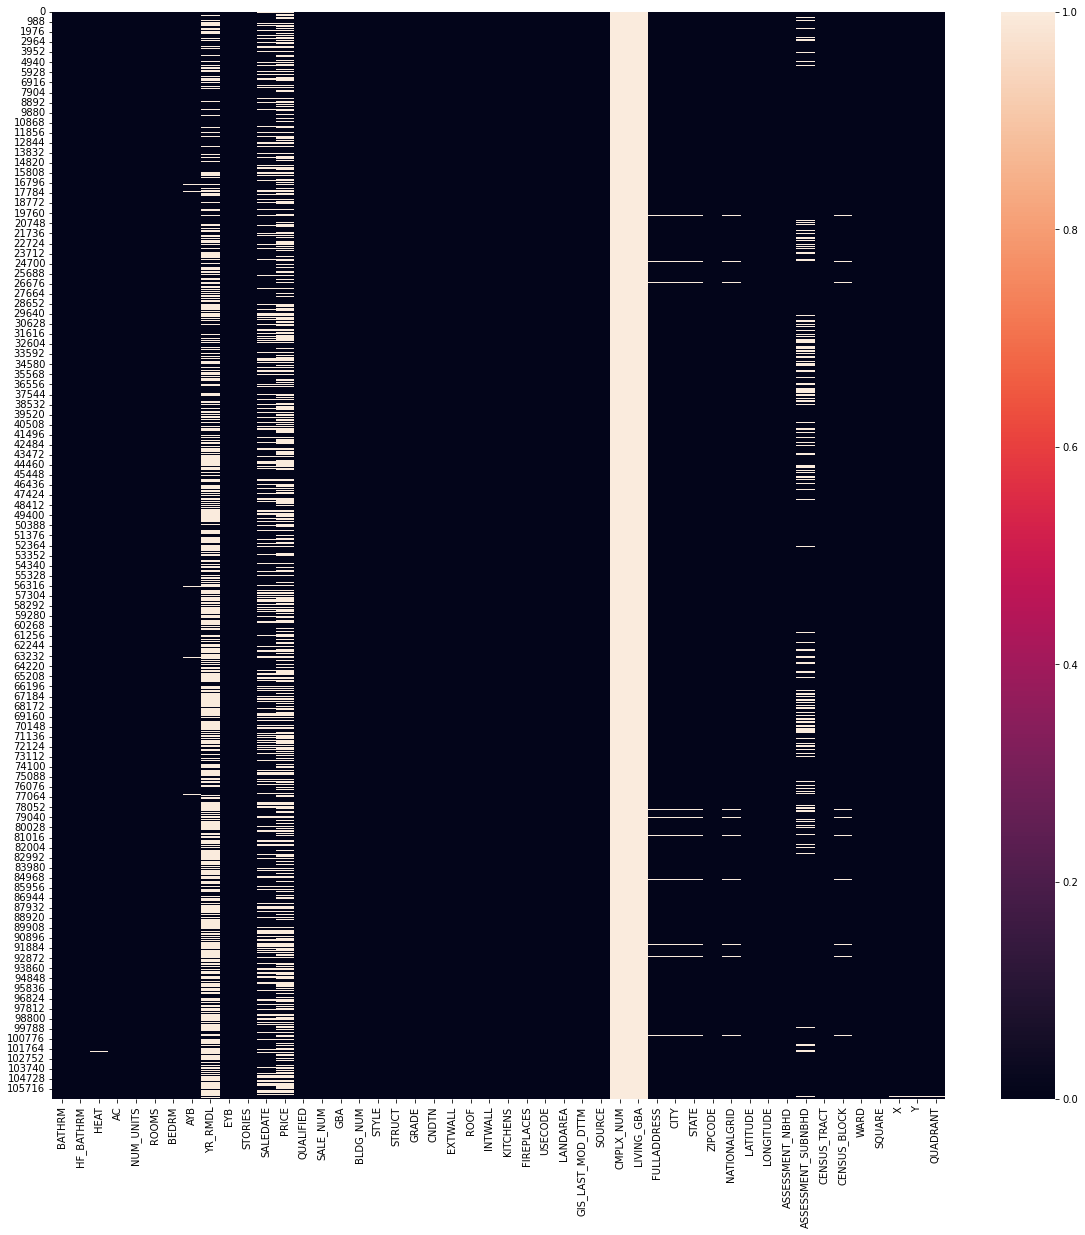

In [584]:
plt.figure(figsize=(20,20))# untuk size
sns.heatmap(df_res.isna()) # untuk plot heatmap NaN
plt.savefig('handling missing.png') # untuk mensave hasil plot

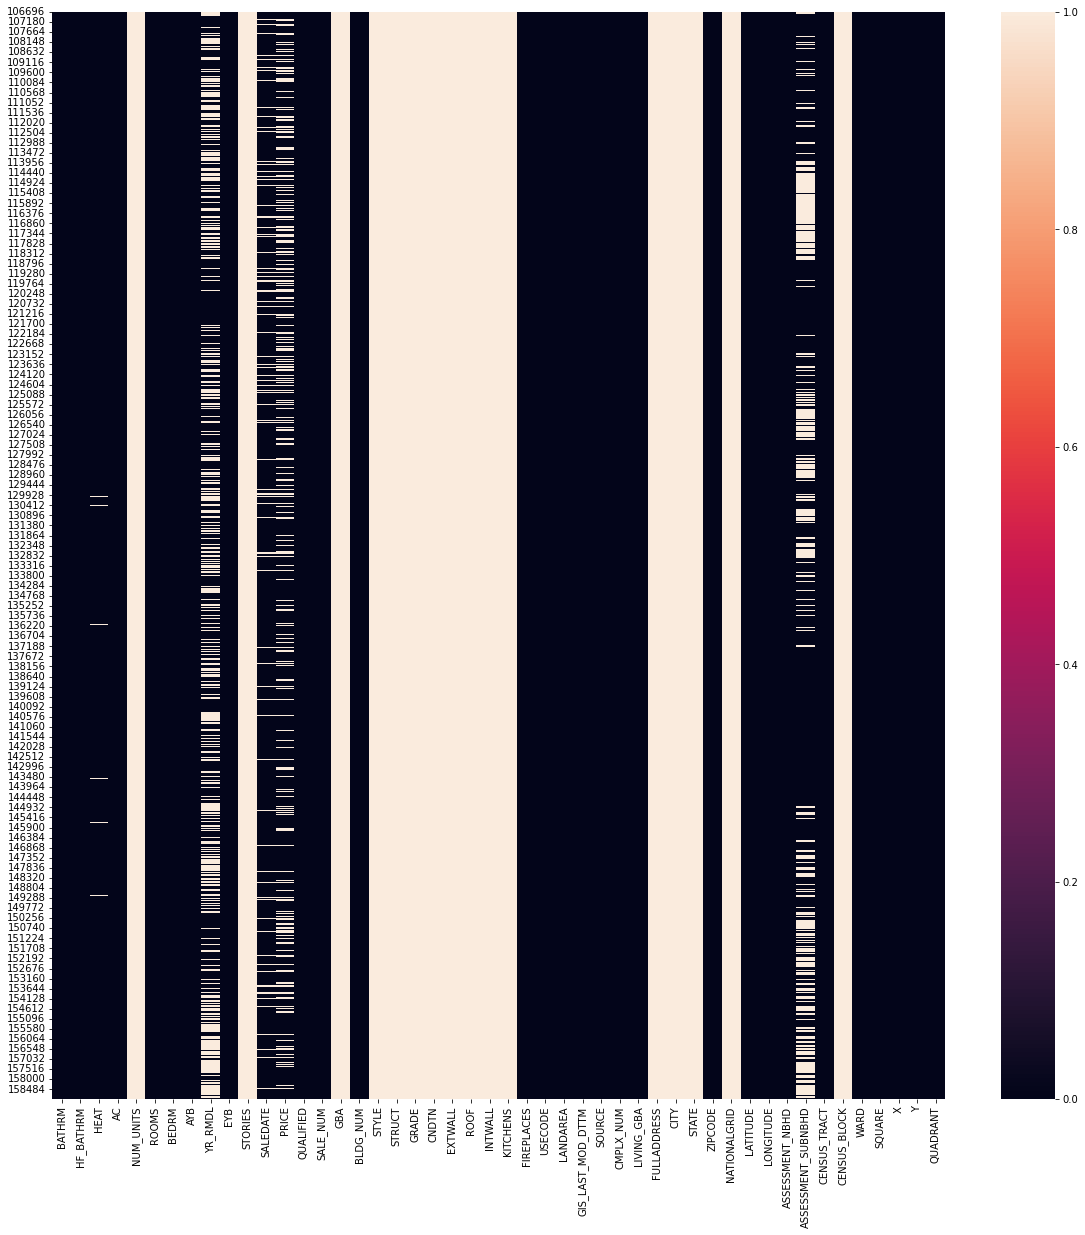

In [585]:
plt.figure(figsize=(20,20))# untuk size
sns.heatmap(df_con.isna()) # untuk plot heatmap NaN
plt.savefig('handling missing.png') # untuk mensave hasil plot

## 1.1 Residential

### 1. Load Data set

In [586]:
df_res = df[df['SOURCE'] == 'Residential']
df_res.shape

(106696, 48)

### 2. Menghitung Missing Data

In [587]:
df_res.isnull().sum().sort_values(ascending=False)

LIVING_GBA            106696
CMPLX_NUM             106696
YR_RMDL                57417
PRICE                  48796
SALEDATE               22513
ASSESSMENT_SUBNBHD     15536
FULLADDRESS              656
CENSUS_BLOCK             645
CITY                     645
STATE                    645
NATIONALGRID             645
AYB                      241
X                        237
QUADRANT                 237
Y                        237
HEAT                      60
STORIES                   44
GRADE                     19
WARD                       1
LONGITUDE                  1
LATITUDE                   1
ZIPCODE                    1
CENSUS_TRACT               1
ASSESSMENT_NBHD            1
KITCHENS                   1
FIREPLACES                 0
BLDG_NUM                   0
AC                         0
NUM_UNITS                  0
SQUARE                     0
ROOMS                      0
BEDRM                      0
EYB                        0
QUALIFIED                  0
SALE_NUM      

In [588]:
df_res.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

### 3. Preprosesing Data

#### - Drop data

In [589]:
# Drop Price NaN

mask = df_res["PRICE"].isnull()
unknown = df_res[mask]
df_res = df_res[~mask]

In [590]:
#drop colom yang 100% kosong, karena ini merupakan data milik condominimum

df_res = df_res.drop(columns=['LIVING_GBA', 'CMPLX_NUM'])

In [591]:
# Menghapus missing data SALEDATE, Hal ini dilakukan karena Missing data hanya 1 data 
df_res.dropna(subset=['SALEDATE'], inplace = True)

In [592]:
#QUADRAN Drop NaN
df_res.dropna(subset=['QUADRANT'], inplace = True)

#### - Mengisi dengan data lain
- Mengisi ```YR_RMDL``` di isi dengan ```EYB``` diasumsikan renovasi (EYB) sekaligus merubah model rumah
- Mengisi ```KITCHENs``` di isi dengan ```NUM_UNIT``` dikarenakan korelasi 88%

In [593]:
# Mengisi missing data YR_RMDL dengan data EYB
df_res['YR_RMDL'] = df_res.apply(
    lambda row: row['EYB'] if np.isnan(row['YR_RMDL']) else row['YR_RMDL'],
    axis=1
)

In [594]:
# Mengisi missing data AYB dengan data EYB
df_res['AYB'] = df_res.apply(
    lambda row: row['EYB'] if np.isnan(row['AYB']) else row['AYB'],
    axis=1
)

#### - Mengisi NaN dengan Median

In [595]:
# Menggisi Missing data STORIES dengan Median
df_res['STORIES'].fillna(df['STORIES'].median(), inplace=True)

#### - Mengisi NaN dengan Modus

In [596]:
# Menggisi Missing data KITCHENS dengan modus
df_res['KITCHENS'].fillna(df['KITCHENS'].mode()[0], inplace=True)

In [597]:
# Menggisi Missing data GRADE dengan modus
df_res['GRADE'].fillna(df['GRADE'].mode()[0], inplace=True)

In [598]:
# Menggisi Missing data HEAT dengan modus
df_res['HEAT'].fillna(df['HEAT'].mode()[0], inplace=True)

In [599]:
df_res.shape

(57798, 46)

In [600]:
df_res.isnull().sum().sort_values(ascending=False)

ASSESSMENT_SUBNBHD    7970
FULLADDRESS            335
CENSUS_BLOCK           331
CITY                   331
STATE                  331
NATIONALGRID           331
BATHRM                   0
ZIPCODE                  0
FIREPLACES               0
USECODE                  0
LANDAREA                 0
GIS_LAST_MOD_DTTM        0
SOURCE                   0
LATITUDE                 0
HF_BATHRM                0
LONGITUDE                0
ASSESSMENT_NBHD          0
CENSUS_TRACT             0
WARD                     0
SQUARE                   0
X                        0
Y                        0
KITCHENS                 0
INTWALL                  0
ROOF                     0
EXTWALL                  0
HEAT                     0
AC                       0
NUM_UNITS                0
ROOMS                    0
BEDRM                    0
AYB                      0
YR_RMDL                  0
EYB                      0
STORIES                  0
SALEDATE                 0
PRICE                    0
Q

### 4. Feature Enginering 

##### Menghitung perbedaan tahun antara data
perhitungan ini ditujukan agar dapat mengetahui:
- perbedaan tahun antara perbedaan Last Sale Date dan Year Build
- perbedaan tahun antara perbedaan Last Sale Date dan Year Improved

In [601]:
df_res['SALEDATE'] = pd.to_datetime(df_res['SALEDATE'])
df_res['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df_res['GIS_LAST_MOD_DTTM'])

#Last Sale Date vs Year Built
df_res['SalevYB']=df_res['SALEDATE'].dt.year - df_res['AYB']
#Last Sale Date vs Year Improved
df_res['SalevYI']=df_res['SALEDATE'].dt.year - df_res['EYB']

In [602]:
df_res1 = df_res.copy() # Data Unutuk Clustering
df_res2 = df_res.copy() # Data Untuk Time Series

### 5. Data Preprocessing
- Dummy Variable

In [603]:
df_res.AC.replace('0', 0, inplace=True)
df_res.AC.replace('Y', 1, inplace=True)
df_res.AC.replace('N', 0, inplace = True)

In [604]:
# Mengubah mendjadi categorycal
df_res[['HEAT','AC', 'QUALIFIED','STYLE','STRUCT','GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD']] = df_res[['HEAT','AC', 'QUALIFIED','STYLE','STRUCT','GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD']].apply(lambda x : x.astype('category'))

In [605]:
df_res=df_res.join(pd.get_dummies(df_res['HEAT'], prefix='HEAT', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['AC'],  prefix='AC', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['QUALIFIED'],  prefix='QUALIFIED', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['STYLE'],  prefix='STYLE', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['STRUCT'],  prefix='STRUCT', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['GRADE'],  prefix='GRADE', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['CNDTN'],  prefix='CNDTN', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['EXTWALL'],  prefix='EXTWALL', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['ROOF'],  prefix='ROOF', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['INTWALL'],  prefix='INTWALL', prefix_sep='_', drop_first=True));
df_res=df_res.join(pd.get_dummies(df_res['WARD'],  prefix='WARD', prefix_sep='_', drop_first=True));

- Drop Unusing Data

In [606]:
# Drop data asli yang telah di buatkan Dummy variable

dropdata = ['HEAT','AC', 'QUALIFIED','STYLE','STRUCT','GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD',  'X', 'Y','ASSESSMENT_SUBNBHD', 'FULLADDRESS','CENSUS_BLOCK', 'CITY','STATE', 'NATIONALGRID', 'SALEDATE', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'ASSESSMENT_NBHD', 'SQUARE', 'QUADRANT', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT']
df_res.drop(dropdata, axis = 1, inplace = True)

df_res.reset_index(inplace = True, drop=True)

### 6. Normalize ```[PRICE]``` 

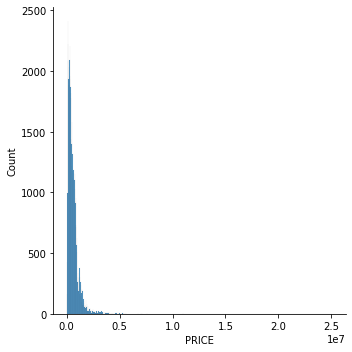

In [607]:
# Plot ['PRICE'] base model

print(sns.displot(df_res['PRICE']))

In [608]:
# Tranformasi Box-Cox
df1_res = df_res.copy()
col_names = ['PRICE']
features = df1_res[col_names]
features = PowerTransformer(method='box-cox').fit_transform(features.values)

df1_res['PRICE'] = features

# Tranformasi Inverse Qubic
df_res['PRICE']=df_res['PRICE']**(1./3)

-  ```df[Price]``` Box-Cox vs ```df[Price]``` Inverse Qubic

df[Price] vs df[Price] Tranformasi  


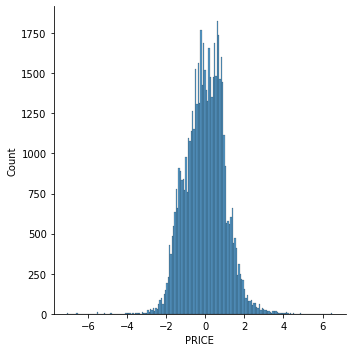

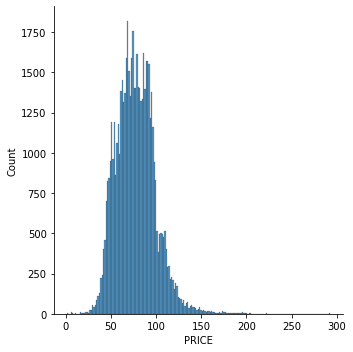

In [609]:
print(sns.displot(df1_res['PRICE'])) # Persebaran data PRICE Box Cox

print(sns.displot(df_res['PRICE'])) # Persebaran data PRICE - Inverse Qubic

print('df[''Price''] vs df[''Price''] Tranformasi  ' )

KESIMPULAN:  
kita memilih Tranformasi Inverse Qubic agar lebih mudah mengembalikan nilai hasil regresi ke data awal

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

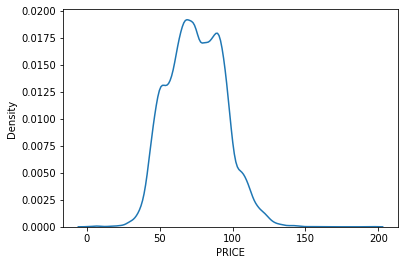

In [610]:
#remove outliers
df_res=df_res[(np.abs(stats.zscore(df_res)) < 6).all(axis=1)]

#Assign IVs to X and DV to y
X=df_res.drop(['PRICE'],axis=1)
y=df_res['PRICE']

sns.kdeplot(y)

- Berdasaarkan hasil di atas, hasil PRICE transform Kubik adalah model terbaik untuk menjadikan PRICE agar menjadi lebih ternormal persebaran datanya.
- setelah berahasil dilakukan normalisasi, ketika akan di implementasikan harus dikembalikan ke data asli dengan dipakngkatkan 3 (^3)

In [611]:
df.shape

(158957, 48)

### 7. Output

In [612]:
df_res.to_csv('Data/DC_Prop_Residential_Regression.csv')

In [613]:
df_res.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,SalevYB,SalevYI,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_1,QUALIFIED_U,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_4.5 Story Fin,STYLE_4.5 Story Unfin,STYLE_Bi-Level,STYLE_Default,STYLE_Outbuildings,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_Superior,GRADE_Very Good,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,EXTWALL_Aluminum,EXTWALL_Brick Veneer,EXTWALL_Brick/Siding,EXTWALL_Brick/Stone,EXTWALL_Brick/Stucco,EXTWALL_Common Brick,EXTWALL_Concrete,EXTWALL_Concrete Block,EXTWALL_Default,EXTWALL_Face Brick,EXTWALL_Hardboard,EXTWALL_Metal Siding,EXTWALL_Plywood,EXTWALL_SPlaster,EXTWALL_Shingle,EXTWALL_Stone,EXTWALL_Stone Veneer,EXTWALL_Stone/Siding,EXTWALL_Stone/Stucco,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Concrete,ROOF_Concrete Tile,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,ROOF_Wood- FS,INTWALL_Ceramic Tile,INTWALL_Default,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,103.071368,1,2522.0,1,2.0,5,24,1680,93.0,31,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,128.057916,3,2522.0,1,2.0,4,24,1680,106.0,32,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,117.009423,1,2484.0,1,2.0,3,24,1680,106.0,22,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,1,2.0,8,4,1906.0,2011.0,1972,3.0,101.639636,1,2401.0,1,2.0,1,24,1627,105.0,39,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,3,1,2.0,7,3,1908.0,2008.0,1967,2.0,112.662317,4,1488.0,1,2.0,1,24,1424,110.0,51,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 9. Data Visualisation
- Bikin Grafik atau Map untuk EDA (Folium, Korelasi, grafik lain)
- 

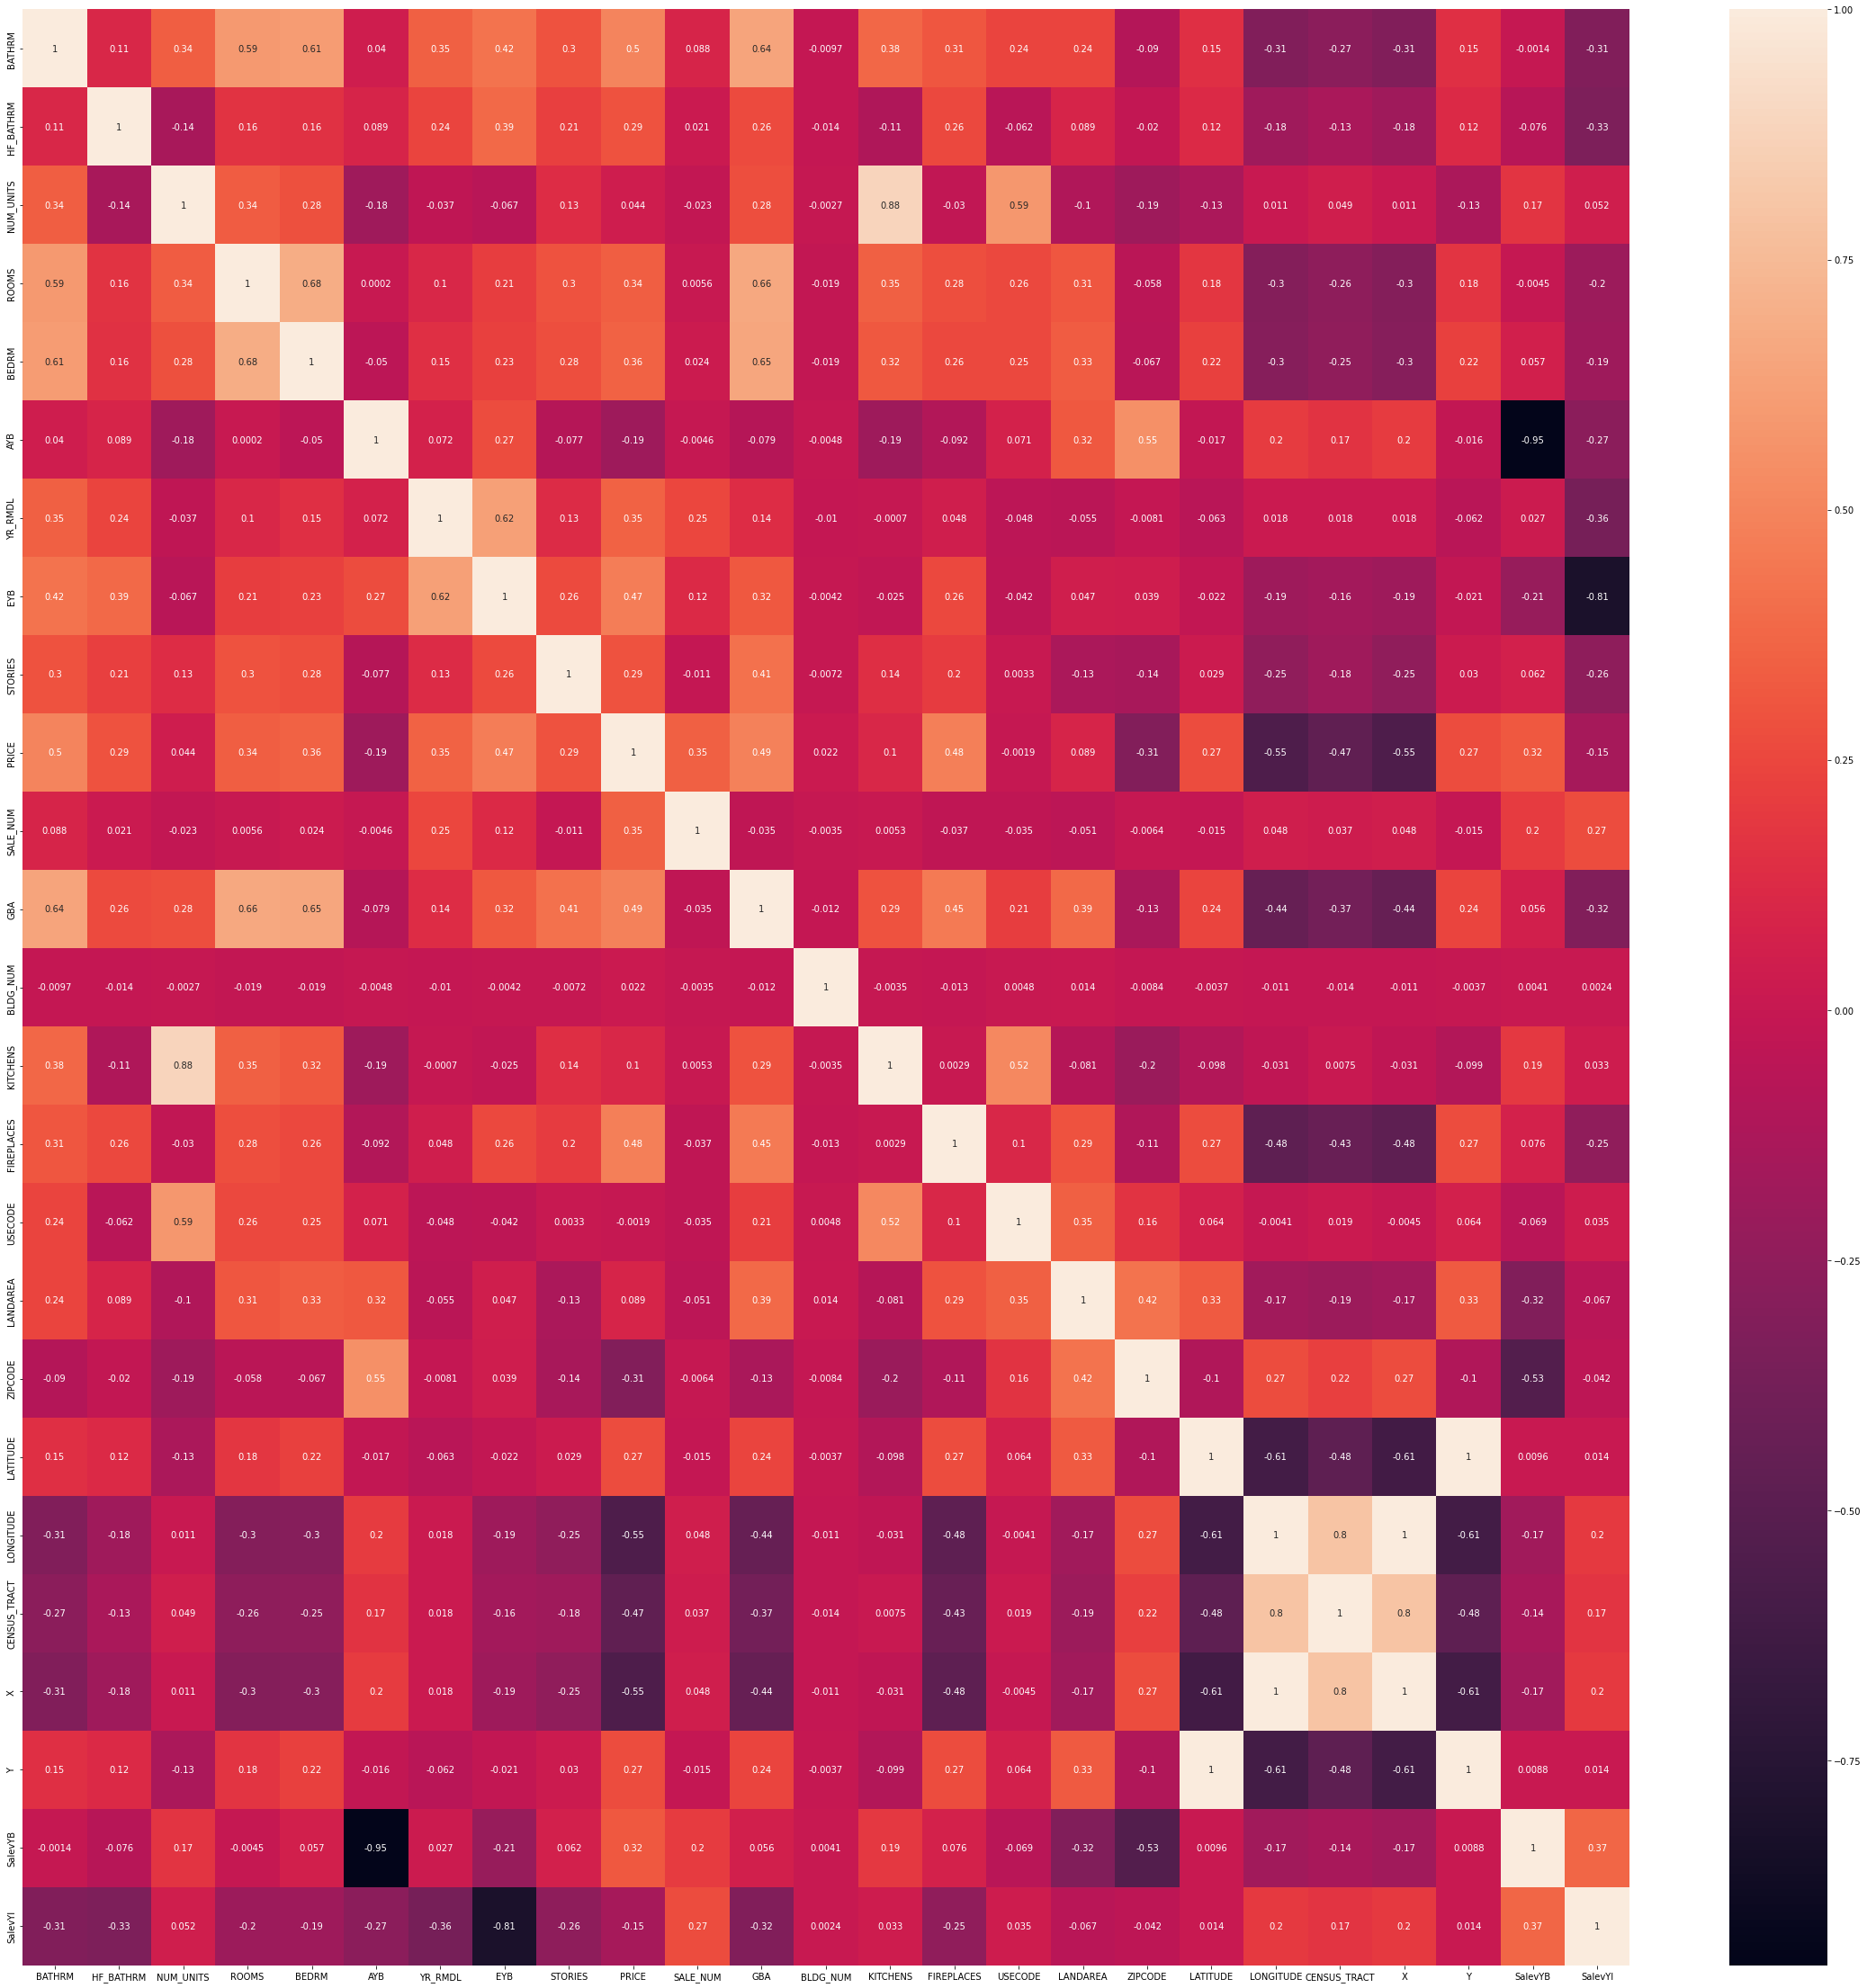

In [614]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_res1.corr('spearman'),annot=True,)
plt.savefig('Corr.png')

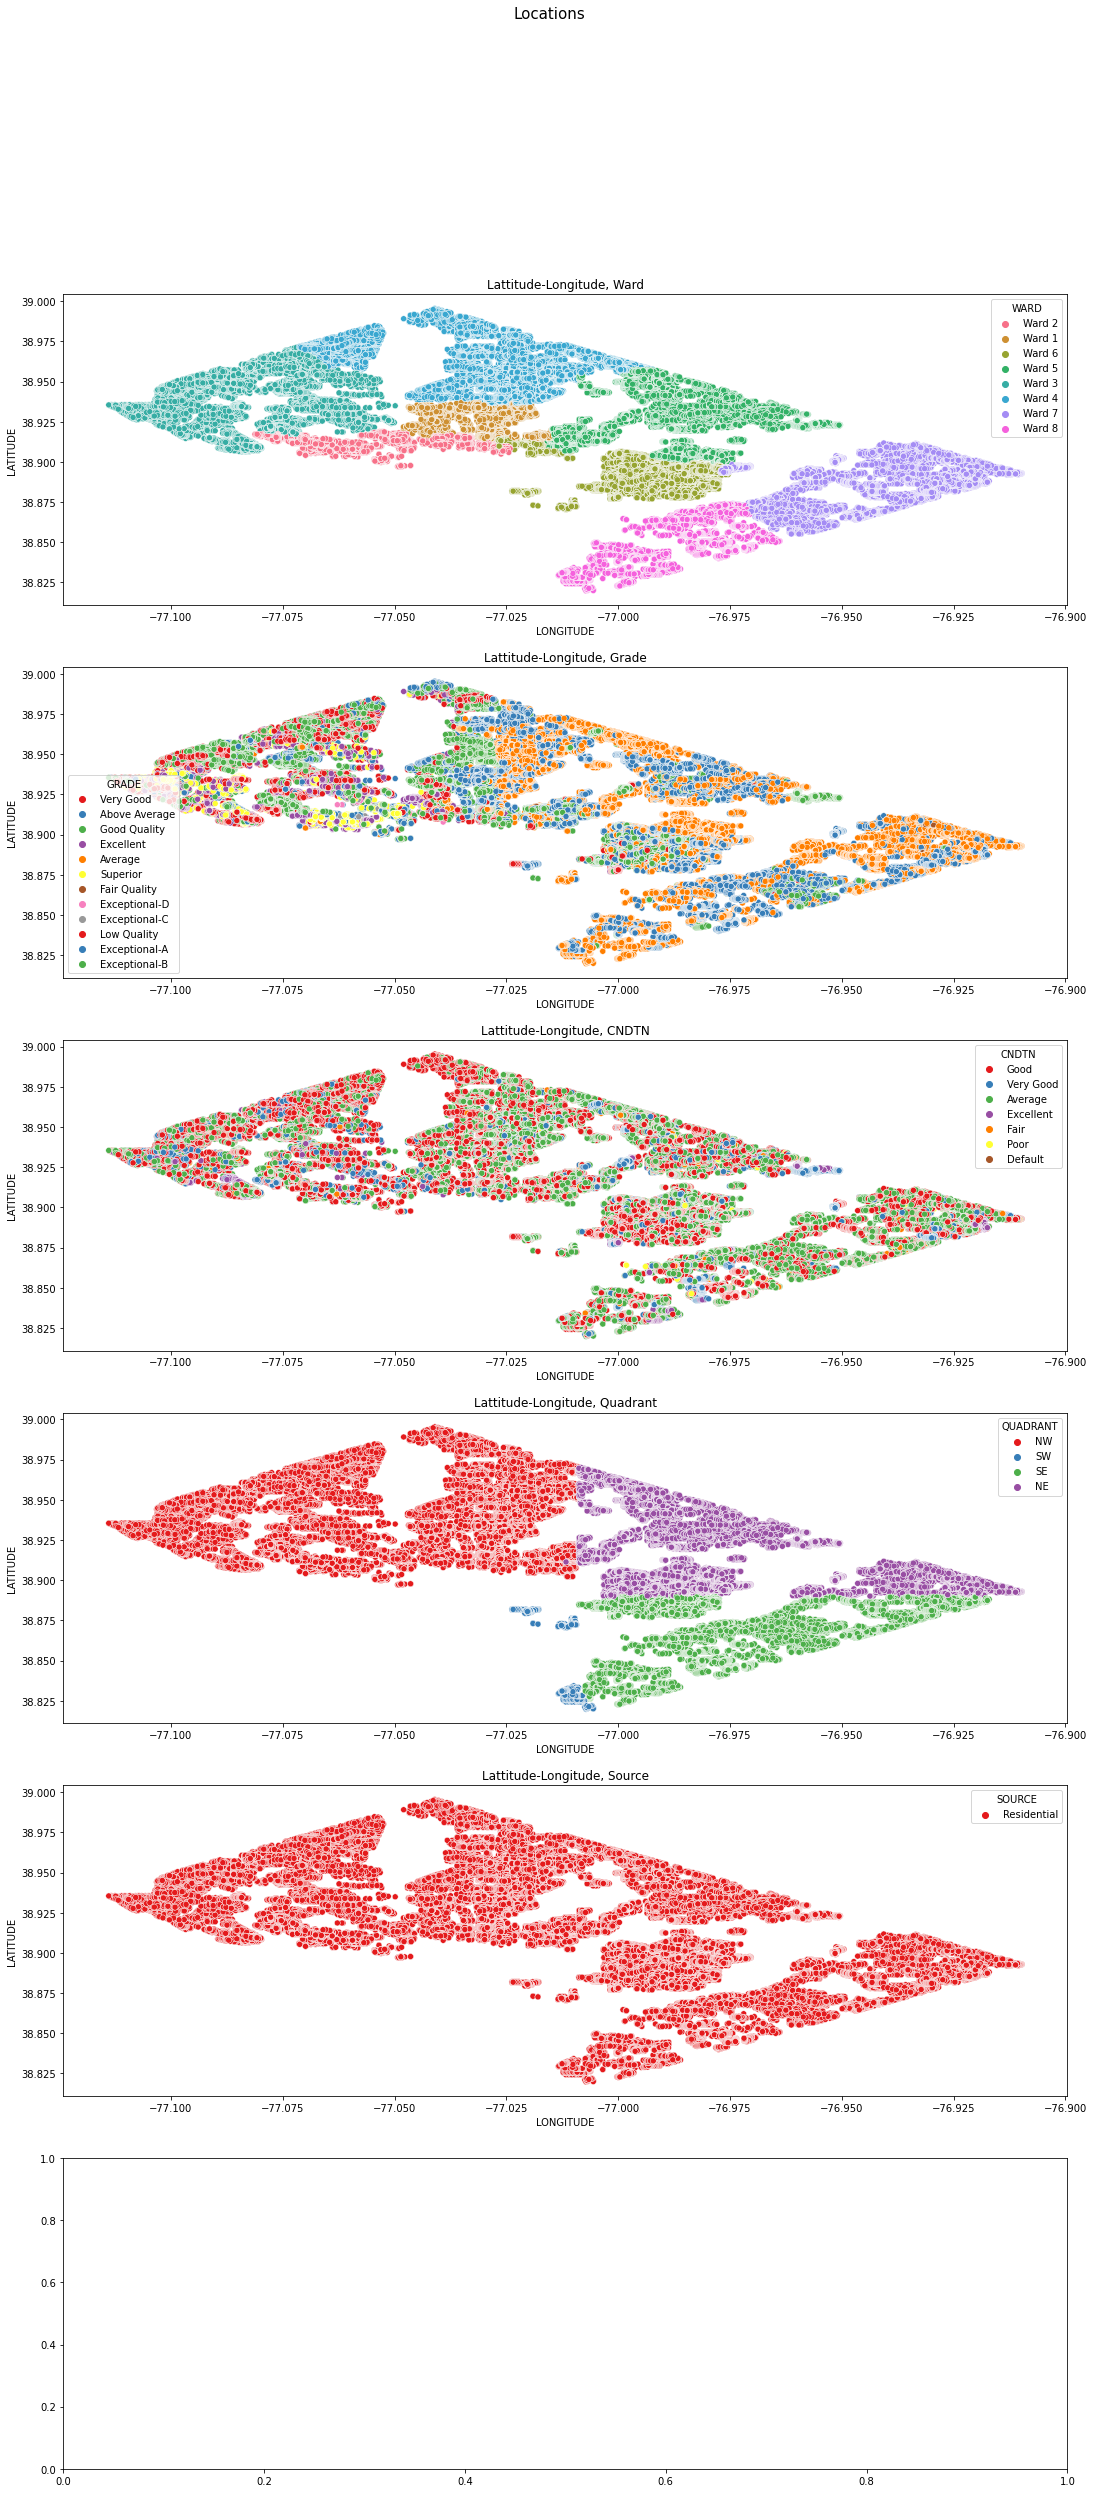

In [615]:
fig, axarr = plt.subplots(6, 1, figsize=(18, 40))
fig.suptitle('Locations',fontsize=15)

sns.scatterplot(y=df_res1['LATITUDE'],x=df_res1['LONGITUDE'],hue=df_res1['WARD'],palette='husl',ax=axarr[0]).set_title('Lattitude-Longitude, Ward')
sns.scatterplot(y=df_res1['LATITUDE'],x=df_res1['LONGITUDE'],hue=df_res1['GRADE'],palette='Set1',ax=axarr[1]).set_title('Lattitude-Longitude, Grade')
sns.scatterplot(y=df_res1['LATITUDE'],x=df_res1['LONGITUDE'],hue=df_res1['CNDTN'],palette='Set1',ax=axarr[2]).set_title('Lattitude-Longitude, CNDTN')
sns.scatterplot(y=df_res1['LATITUDE'],x=df_res1['LONGITUDE'],hue=df_res1['QUADRANT'],palette='Set1',ax=axarr[3]).set_title('Lattitude-Longitude, Quadrant')
sns.scatterplot(y=df_res1['LATITUDE'],x=df_res1['LONGITUDE'],hue=df_res1['SOURCE'],palette='Set1',ax=axarr[4]).set_title('Lattitude-Longitude, Source')

plt.show()

## 1.2 Condominium

### 1. Load Data set

In [616]:
df_con = df[df['SOURCE'] == 'Condominium']
df_con.shape

(52261, 48)

In [617]:
df_con.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
106696,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2016-12-20 00:00:00,599900.0,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,716,2018-07-22 18:01:38,Condominium,5329.0,1084.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW
106697,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2016-12-13 00:00:00,NaN,U,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,827,2018-07-22 18:01:38,Condominium,5329.0,1237.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW
106698,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2017-02-22 00:00:00,677900.0,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,844,2018-07-22 18:01:38,Condominium,5329.0,1267.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW
106699,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2016-12-22 00:00:00,659900.0,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,763,2018-07-22 18:01:38,Condominium,5329.0,1151.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW
106700,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2016-12-19 00:00:00,645000.0,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,716,2018-07-22 18:01:38,Condominium,5329.0,1080.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW


### 2. Menghitung Missing Data

In [618]:
df_con.isnull().sum().sort_values(ascending=False)

KITCHENS              52261
CENSUS_BLOCK          52261
STATE                 52261
NATIONALGRID          52261
INTWALL               52261
ROOF                  52261
EXTWALL               52261
CNDTN                 52261
GRADE                 52261
STRUCT                52261
STYLE                 52261
FULLADDRESS           52261
GBA                   52261
CITY                  52261
NUM_UNITS             52261
STORIES               52261
YR_RMDL               20612
ASSESSMENT_SUBNBHD    17015
PRICE                 11945
SALEDATE               4257
HEAT                    270
AYB                      30
WARD                      0
SQUARE                    0
CENSUS_TRACT              0
ASSESSMENT_NBHD           0
LONGITUDE                 0
LATITUDE                  0
Y                         0
ZIPCODE                   0
X                         0
BATHRM                    0
LIVING_GBA                0
CMPLX_NUM                 0
SOURCE                    0
GIS_LAST_MOD_DTTM   

In [619]:
df_con.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

### 3. Preprosesing Data

#### - Drop data

In [620]:
# Drop Price NaN
mask = df_con["PRICE"].isnull()
unknown = df_con[mask]
df_con = df_con[~mask]

In [621]:
#drop colom yang 100% kosong, karena data condominimum tidak memiliki data ini

df_con = df_con.drop(columns=['KITCHENS', 'CENSUS_BLOCK', 'STATE', 'NATIONALGRID', 'INTWALL', 'ROOF', 'EXTWALL' , 'CNDTN' , 'GRADE', 'STRUCT', 'STYLE' , 'FULLADDRESS', 'GBA' , 'CITY', 'NUM_UNITS', 'STORIES'])

In [622]:
#drop colom ```ASSESSMENT_SUBNBHD```, karena data tidak digunakan di ketika regresi

df_con = df_con.drop(columns=['ASSESSMENT_SUBNBHD', 'BLDG_NUM'])

#### - Mengisi dengan data lain
- Mengisi ```YR_RMDL``` di isi dengan ```EYB``` diasumsikan renovasi (EYB) sekaligus merubah model rumah
- Mengisi ```KITCHENs``` di isi dengan ```NUM_UNIT``` dikarenakan korelasi 88%

In [623]:
# Mengisi missing data YR_RMDL dengan data EYB
df_con['YR_RMDL'] = df_con.apply(
    lambda row: row['EYB'] if np.isnan(row['YR_RMDL']) else row['YR_RMDL'],
    axis=1
)

In [624]:
# Mengisi missing data AYB dengan data EYB
df_con['AYB'] = df_con.apply(
    lambda row: row['EYB'] if np.isnan(row['AYB']) else row['AYB'],
    axis=1
)

#### - Mengisi NaN dengan Median

#### - Mengisi NaN dengan Modus

In [625]:
# Menggisi Missing data HEAT dengan modus
df_con['HEAT'].fillna(df['HEAT'].mode()[0], inplace=True)

In [626]:
df_con.shape

(40316, 30)

In [627]:
df_con.isnull().sum().sort_values(ascending=False)

BATHRM               0
HF_BATHRM            0
Y                    0
X                    0
SQUARE               0
WARD                 0
CENSUS_TRACT         0
ASSESSMENT_NBHD      0
LONGITUDE            0
LATITUDE             0
ZIPCODE              0
LIVING_GBA           0
CMPLX_NUM            0
SOURCE               0
GIS_LAST_MOD_DTTM    0
LANDAREA             0
USECODE              0
FIREPLACES           0
SALE_NUM             0
QUALIFIED            0
PRICE                0
SALEDATE             0
EYB                  0
YR_RMDL              0
AYB                  0
BEDRM                0
ROOMS                0
AC                   0
HEAT                 0
QUADRANT             0
dtype: int64

### 4. Feature Enginering 

##### Menghitung perbedaan tahun antara data
perhitungan ini ditujukan agar dapat mengetahui:
- perbedaan tahun antara perbedaan Last Sale Date dan Year Build
- perbedaan tahun antara perbedaan Last Sale Date dan Year Improved

In [628]:
df_con['SALEDATE'] = pd.to_datetime(df_con['SALEDATE'])
df_con['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df_con['GIS_LAST_MOD_DTTM'])

#Last Sale Date vs Year Built
df_con['SalevYB']=df_con['SALEDATE'].dt.year - df_con['AYB']
#Last Sale Date vs Year Improved
df_con['SalevYI']=df_con['SALEDATE'].dt.year - df_con['EYB']

In [629]:
df_con1 = df_con.copy() # Data Unutuk Clustering
df_con2 = df_con.copy() # Data Untuk Time Series

In [630]:
df_con2.isnull().sum()

BATHRM               0
HF_BATHRM            0
HEAT                 0
AC                   0
ROOMS                0
BEDRM                0
AYB                  0
YR_RMDL              0
EYB                  0
SALEDATE             0
PRICE                0
QUALIFIED            0
SALE_NUM             0
FIREPLACES           0
USECODE              0
LANDAREA             0
GIS_LAST_MOD_DTTM    0
SOURCE               0
CMPLX_NUM            0
LIVING_GBA           0
ZIPCODE              0
LATITUDE             0
LONGITUDE            0
ASSESSMENT_NBHD      0
CENSUS_TRACT         0
WARD                 0
SQUARE               0
X                    0
Y                    0
QUADRANT             0
SalevYB              0
SalevYI              0
dtype: int64

### 5. Data Preprocessing
- Dummy Variable

In [631]:
df_con.AC.replace('0', 0, inplace=True)
df_con.AC.replace('Y', 1, inplace=True)
df_con.AC.replace('N', 0, inplace = True)

In [632]:
df_con.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,SALEDATE,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,X,Y,QUADRANT,SalevYB,SalevYI
106696,2,0,Forced Air,1,4,2,1911.0,2016.0,1919,2016-12-20,599900.0,Q,2,0,16,716,2018-07-22 18:01:38,Condominium,5329.0,1084.0,20010.0,38.933606,-77.021312,Columbia Heights,3200.0,Ward 1,3037,-77.021314,38.933613,NW,105.0,97
106698,2,0,Forced Air,1,4,2,1911.0,2016.0,1919,2017-02-22,677900.0,U,2,0,16,844,2018-07-22 18:01:38,Condominium,5329.0,1267.0,20010.0,38.933606,-77.021312,Columbia Heights,3200.0,Ward 1,3037,-77.021314,38.933613,NW,106.0,98


In [633]:
# Mengubah mendjadi categorycal
df_con[['HEAT','AC', 'QUALIFIED', 'WARD']] = df_con[['HEAT','AC', 'QUALIFIED', 'WARD']].apply(lambda x : x.astype('category'))

In [634]:
df_con=df_con.join(pd.get_dummies(df_con['HEAT'], prefix='HEAT', prefix_sep='_', drop_first=True));
df_con=df_con.join(pd.get_dummies(df_con['AC'],  prefix='AC', prefix_sep='_', drop_first=True));
df_con=df_con.join(pd.get_dummies(df_con['QUALIFIED'],  prefix='QUALIFIED', prefix_sep='_', drop_first=True));
df_con=df_con.join(pd.get_dummies(df_con['WARD'],  prefix='WARD', prefix_sep='_', drop_first=True));

- Drop Unusing Data

In [635]:
df_con.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,SALEDATE,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,X,Y,QUADRANT,SalevYB,SalevYI,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_1,QUALIFIED_U,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
106696,2,0,Forced Air,1,4,2,1911.0,2016.0,1919,2016-12-20,599900.0,Q,2,0,16,716,2018-07-22 18:01:38,Condominium,5329.0,1084.0,20010.0,38.933606,-77.021312,Columbia Heights,3200.0,Ward 1,3037,-77.021314,38.933613,NW,105.0,97,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
106698,2,0,Forced Air,1,4,2,1911.0,2016.0,1919,2017-02-22,677900.0,U,2,0,16,844,2018-07-22 18:01:38,Condominium,5329.0,1267.0,20010.0,38.933606,-77.021312,Columbia Heights,3200.0,Ward 1,3037,-77.021314,38.933613,NW,106.0,98,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [636]:
# Drop data asli yang telah di buatkan Dummy variable

dropdata = ['HEAT','AC', 'QUALIFIED', 'WARD', 'SALEDATE', 'GIS_LAST_MOD_DTTM', 'CMPLX_NUM', 'SOURCE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD','CENSUS_TRACT', 'SQUARE', 'X', 'Y','QUADRANT']
df_con.drop(dropdata, axis = 1, inplace = True)

df_con.reset_index(inplace = True, drop=True)

In [637]:
df_con.isnull().sum()

BATHRM                 0
HF_BATHRM              0
ROOMS                  0
BEDRM                  0
AYB                    0
YR_RMDL                0
EYB                    0
PRICE                  0
SALE_NUM               0
FIREPLACES             0
USECODE                0
LANDAREA               0
LIVING_GBA             0
SalevYB                0
SalevYI                0
HEAT_Air-Oil           0
HEAT_Elec Base Brd     0
HEAT_Electric Rad      0
HEAT_Evp Cool          0
HEAT_Forced Air        0
HEAT_Gravity Furnac    0
HEAT_Hot Water Rad     0
HEAT_Ht Pump           0
HEAT_Ind Unit          0
HEAT_Wall Furnace      0
HEAT_Warm Cool         0
HEAT_Water Base Brd    0
AC_1                   0
QUALIFIED_U            0
WARD_Ward 2            0
WARD_Ward 3            0
WARD_Ward 4            0
WARD_Ward 5            0
WARD_Ward 6            0
WARD_Ward 7            0
WARD_Ward 8            0
dtype: int64

### 6. Normalize ```[PRICE]``` 

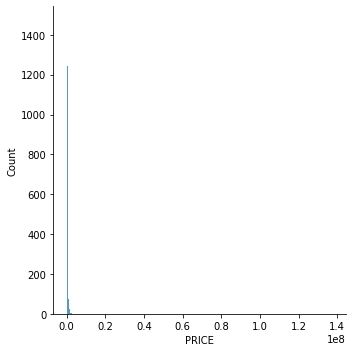

In [638]:
# Plot ['PRICE'] base model

print(sns.displot(df_con['PRICE']))

In [639]:
# Tranformasi Box-Cox
df1_con = df_con.copy()
col_names = ['PRICE']
features = df1_con[col_names]
features = PowerTransformer(method='box-cox').fit_transform(features.values)

df1_con['PRICE'] = features

# Tranformasi Inverse Qubic
df_con['PRICE']=df_con['PRICE']**(1./3)

-  ```df[Price]``` Box-Cox vs ```df[Price]``` Inverse Qubic

df[Price] vs df[Price] Tranformasi  


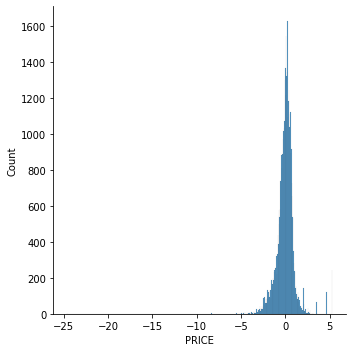

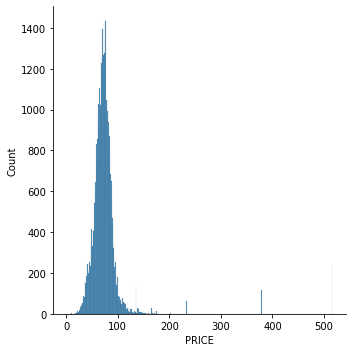

In [640]:
print(sns.displot(df1_con['PRICE'])) # Persebaran data PRICE Box Cox

print(sns.displot(df_con['PRICE'])) # Persebaran data PRICE - Inverse Qubic

print('df[''Price''] vs df[''Price''] Tranformasi  ' )

KESIMPULAN:  
kita memilih Tranformasi Inverse Qubic agar lebih mudah mengembalikan nilai hasil regresi ke data awal

In [641]:
#remove outliers
(np.abs(stats.zscore(df_con))).head()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,SALE_NUM,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,SalevYB,SalevYI,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_1,QUALIFIED_U,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,1.174997,0.41168,0.251813,0.72626,1.264045,1.083438,1.105176,0.208220,0.096381,0.005231,0.40523,0.387982,0.497302,1.398240,1.248626,0.025403,0.066781,0.036623,0.017255,1.134822,0.01796,0.247722,0.813824,0.025887,0.125179,0.292778,0.066594,0.273246,0.573149,0.656247,0.436373,0.20183,0.258213,0.444642,0.190721,0.210653
1,1.174997,0.41168,0.251813,0.72626,1.264045,1.083438,1.105176,0.291407,0.096381,0.005231,0.40523,0.642248,0.948032,1.424116,1.275593,0.025403,0.066781,0.036623,0.017255,1.134822,0.01796,0.247722,0.813824,0.025887,0.125179,0.292778,0.066594,0.273246,1.744745,0.656247,0.436373,0.20183,0.258213,0.444642,0.190721,0.210653
2,1.174997,0.41168,0.251813,0.72626,1.264045,1.083438,1.105176,0.272800,0.096381,0.005231,0.40523,0.481345,0.662324,1.398240,1.248626,0.025403,0.066781,0.036623,0.017255,1.134822,0.01796,0.247722,0.813824,0.025887,0.125179,0.292778,0.066594,0.273246,1.744745,0.656247,0.436373,0.20183,0.258213,0.444642,0.190721,0.210653
3,1.174997,0.41168,0.251813,0.72626,1.264045,1.083438,1.105176,0.257141,0.096381,0.005231,0.40523,0.387982,0.487450,1.398240,1.248626,0.025403,0.066781,0.036623,0.017255,1.134822,0.01796,0.247722,0.813824,0.025887,0.125179,0.292778,0.066594,0.273246,1.744745,0.656247,0.436373,0.20183,0.258213,0.444642,0.190721,0.210653
4,1.174997,0.41168,0.251813,0.72626,1.264045,1.083438,1.105176,0.304641,0.096381,0.005231,0.40523,0.799177,1.287926,1.424116,1.275593,0.025403,0.066781,0.036623,0.017255,1.134822,0.01796,0.247722,0.813824,0.025887,0.125179,0.292778,0.066594,0.273246,0.573149,0.656247,0.436373,0.20183,0.258213,0.444642,0.190721,0.210653


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

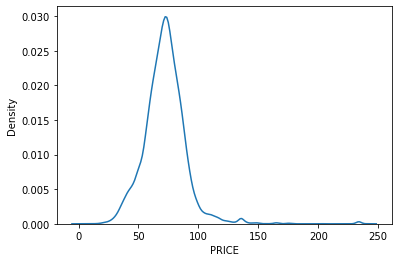

In [642]:
#remove outliers
df_con=df_con[(np.abs(stats.zscore(df_con)) < 6).all(axis=1)]

#Assign IVs to X and DV to y
X=df_con.drop(['PRICE'],axis=1)
y=df_con['PRICE']

sns.kdeplot(y)

- Berdasaarkan hasil di atas, hasil PRICE transform Kubik adalah model terbaik untuk menjadikan PRICE agar menjadi lebih ternormal persebaran datanya.
- setelah berahasil dilakukan normalisasi, ketika akan di implementasikan harus dikembalikan ke data asli dengan dipakngkatkan 3 (^3)

In [643]:
df_con.shape

(38707, 36)

### 7. Output

In [644]:
df_con.to_csv('Data/DC_Prop_Condominium_Regression.csv')

In [645]:
df_con.head()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,SALE_NUM,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,SalevYB,SalevYI,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,AC_1,QUALIFIED_U,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,2,0,4,2,1911.0,2016.0,1919,84.338581,2,0,16,716,1084.0,105.0,97,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,0,4,2,1911.0,2016.0,1919,87.845977,2,0,16,844,1267.0,106.0,98,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,2,0,4,2,1911.0,2016.0,1919,87.061479,2,0,16,763,1151.0,105.0,97,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,2,0,4,2,1911.0,2016.0,1919,86.401226,2,0,16,716,1080.0,105.0,97,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,2,0,4,2,1911.0,2016.0,1919,88.403962,2,0,16,923,1405.0,106.0,98,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### 8. Data Visualisation

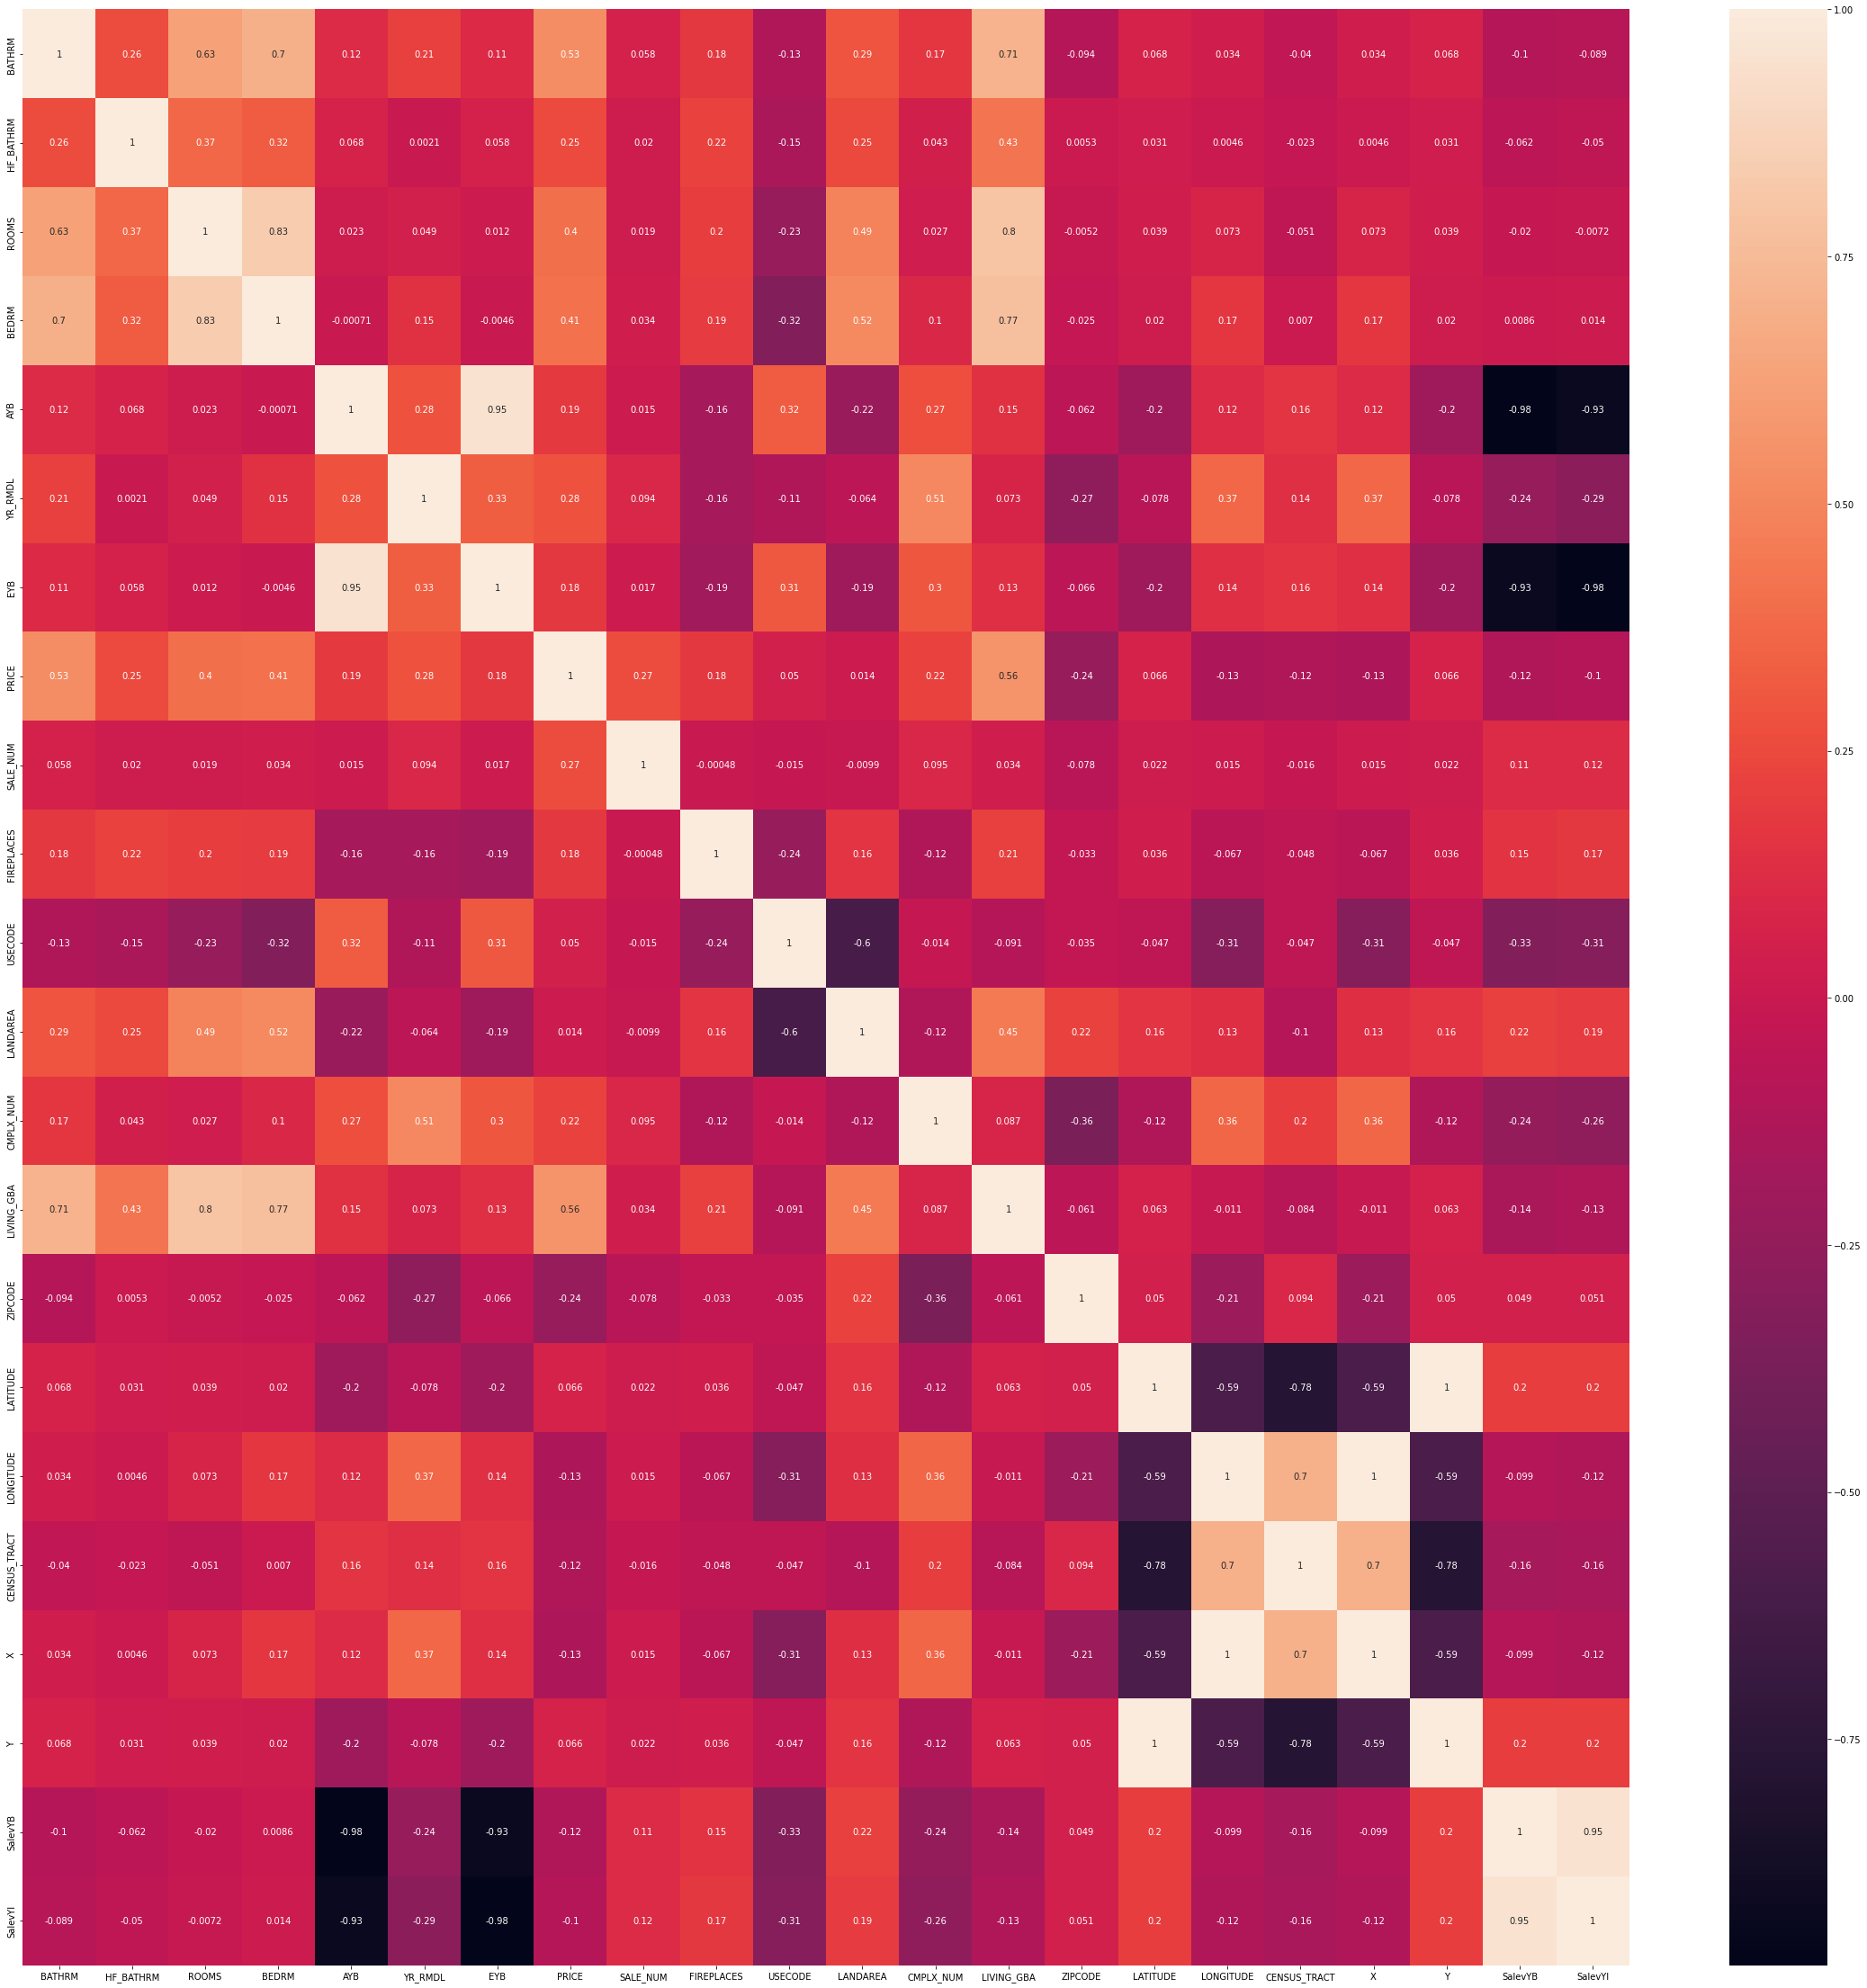

In [646]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_con1.corr('spearman'),annot=True,)
plt.savefig('Corr.png')

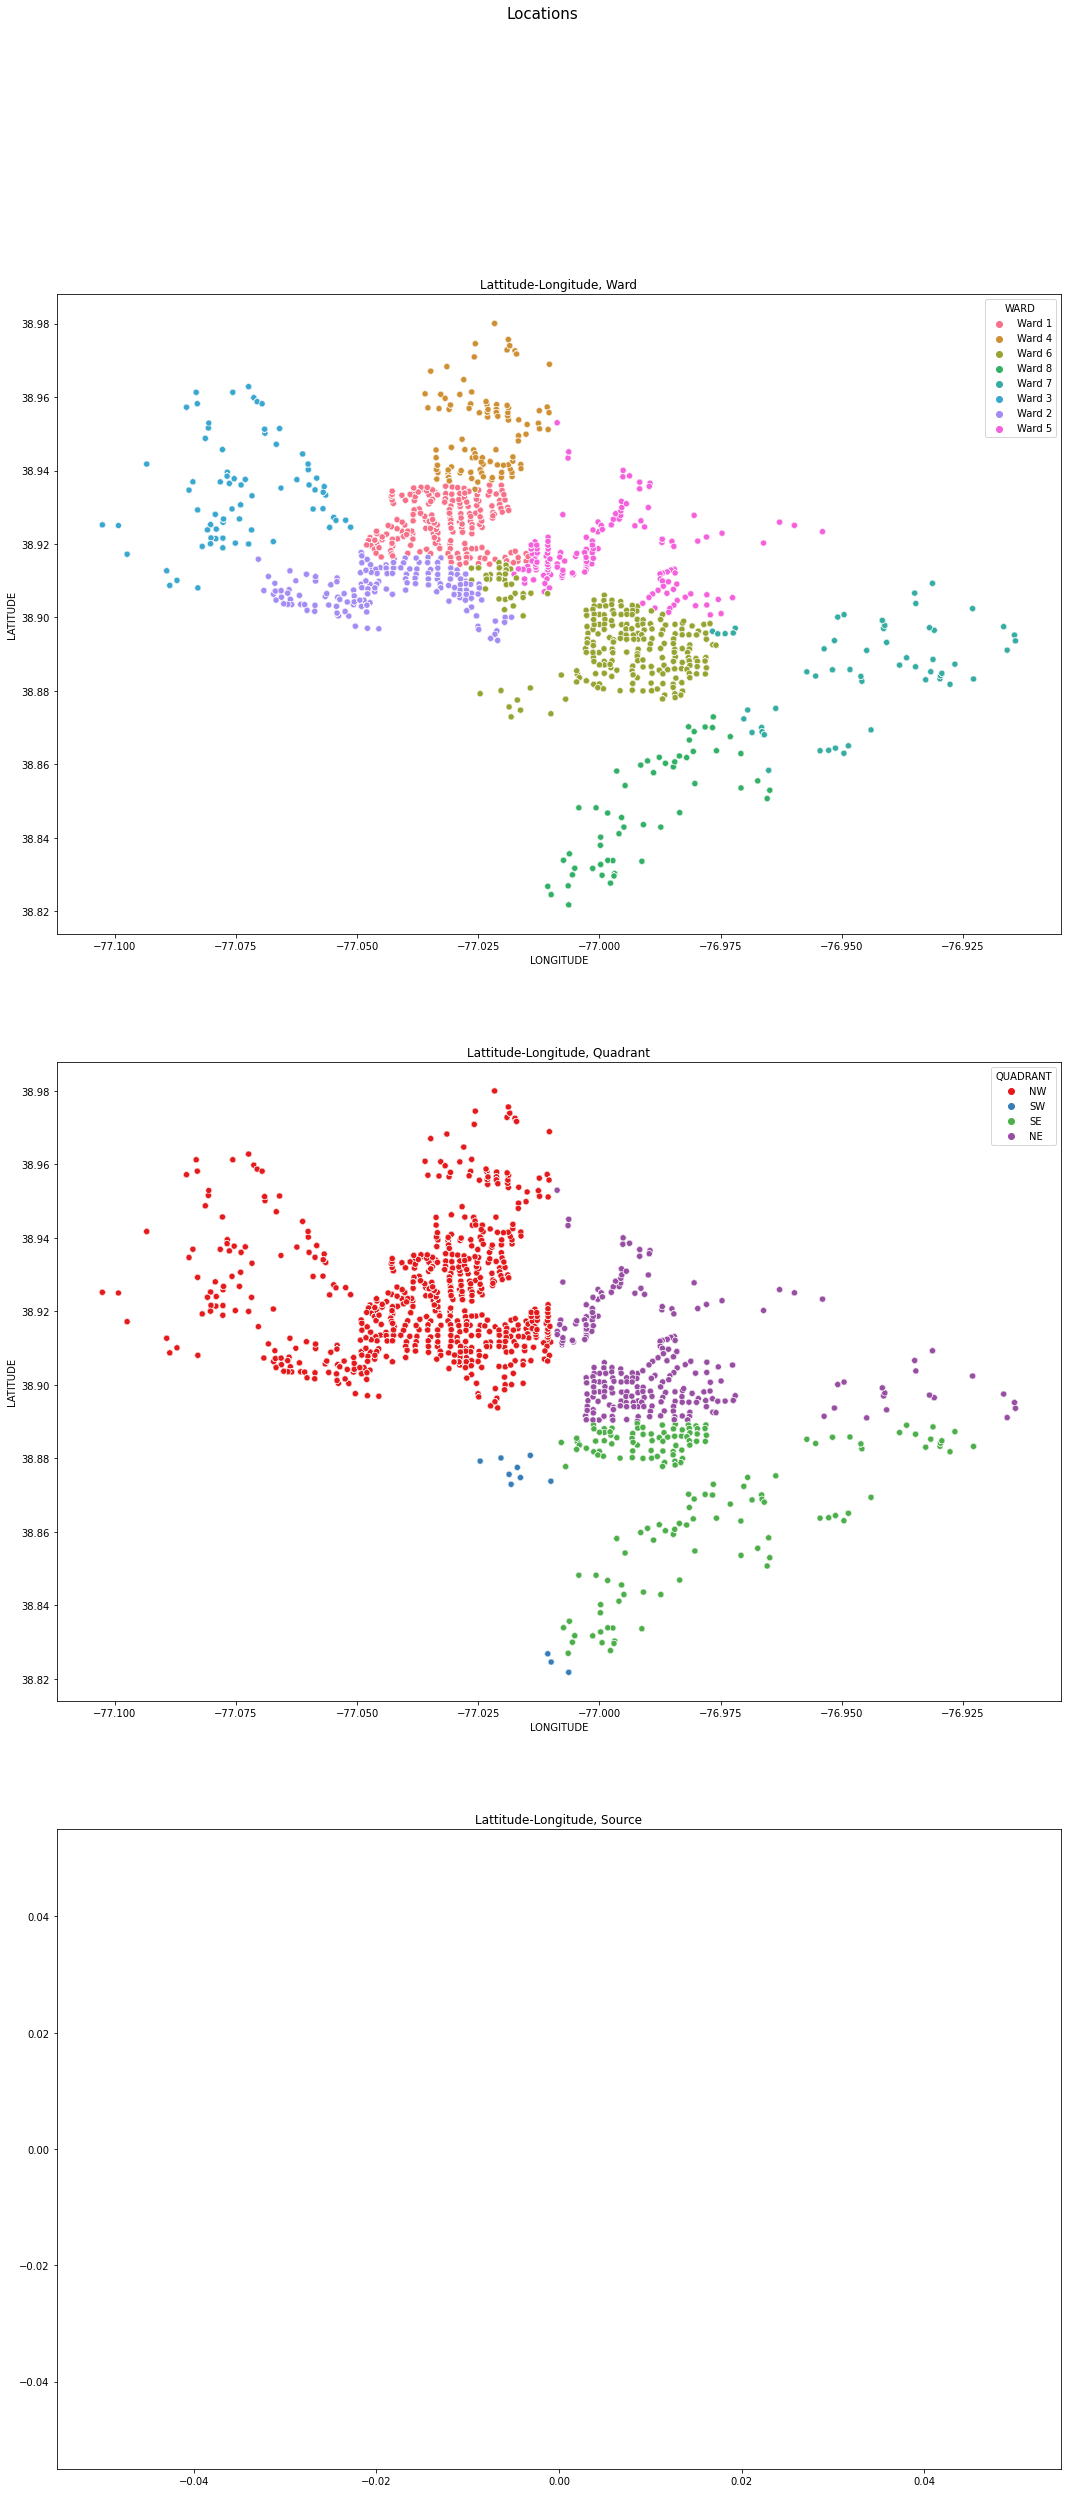

In [647]:
fig, axarr = plt.subplots(3, 1, figsize=(18, 40))
fig.suptitle('Locations',fontsize=15)

sns.scatterplot(y=df_con1['LATITUDE'],x=df_con1['LONGITUDE'],hue=df_con1['WARD'],palette='husl',ax=axarr[0]).set_title('Lattitude-Longitude, Ward')
sns.scatterplot(y=df_con1['LATITUDE'],x=df_con1['LONGITUDE'],hue=df_con1['QUADRANT'],palette='Set1',ax=axarr[1]).set_title('Lattitude-Longitude, Quadrant')
sns.scatterplot(y=df_con1['LATITUDE'],x=df_res1['LONGITUDE'],hue=df_res1['SOURCE'],palette='Set1',ax=axarr[2]).set_title('Lattitude-Longitude, Source')

plt.show()

==========================================

# 2. EDA for Clustering 

## 2.1 Residential

### Prepare data :  `df_res1` 

In [648]:
df_res1.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,SalevYB,SalevYI
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,93.0,31
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,106.0,32


In [649]:
dropdata = ['X', 'Y','ASSESSMENT_SUBNBHD', 'FULLADDRESS','CENSUS_BLOCK', 'CITY','STATE', 'NATIONALGRID', 'SALEDATE', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'ASSESSMENT_NBHD', 'SQUARE', 'QUADRANT', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT']
df_res1.drop(dropdata, axis = 1, inplace = True)

df_res1.reset_index(inplace = True, drop=True)

In [650]:
df_res1.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SalevYB,SalevYI
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,Ward 2,93.0,31
1,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,Ward 2,106.0,32


In [651]:
df_res1.dtypes

BATHRM          int64
HF_BATHRM       int64
HEAT           object
AC             object
NUM_UNITS     float64
ROOMS           int64
BEDRM           int64
AYB           float64
YR_RMDL       float64
EYB             int64
STORIES       float64
PRICE         float64
QUALIFIED      object
SALE_NUM        int64
GBA           float64
BLDG_NUM        int64
STYLE          object
STRUCT         object
GRADE          object
CNDTN          object
EXTWALL        object
ROOF           object
INTWALL        object
KITCHENS      float64
FIREPLACES      int64
USECODE         int64
LANDAREA        int64
WARD           object
SalevYB       float64
SalevYI         int64
dtype: object

### Convert `df_res1` as Numeric

In [652]:
# HEAT

df_res1.HEAT.replace('Warm Cool', 0, inplace=True)
df_res1.HEAT.replace('Hot Water Rad', 1, inplace=True)
df_res1.HEAT.replace('Forced Air', 2, inplace = True)
df_res1.HEAT.replace('Elec Base Brd', 3, inplace=True)
df_res1.HEAT.replace('Ht Pump', 4, inplace=True)
df_res1.HEAT.replace('Wall Furnace', 5, inplace = True)
df_res1.HEAT.replace('Water Base Brd', 6, inplace=True)
df_res1.HEAT.replace('Electric Rad', 7, inplace=True)
df_res1.HEAT.replace('Air Exchng', 8, inplace = True)
df_res1.HEAT.replace('Evp Cool', 9, inplace = True)
df_res1.HEAT.replace('Ind Unit', 10, inplace = True)
df_res1.HEAT.replace('Gravity Furnac', 11, inplace = True)
df_res1.HEAT.replace('Air-Oil', 12, inplace = True)

In [653]:
# AC

df_res1.AC.replace('0', 0, inplace=True)
df_res1.AC.replace('Y', 1, inplace=True)
df_res1.AC.replace('N', 0, inplace = True)

In [654]:
# QUALIFIED

df_res1.QUALIFIED.replace('Q', 0, inplace=True)
df_res1.QUALIFIED.replace('U', 1, inplace=True)

In [655]:
# STYLE

df_res1.STYLE.replace('3 Story', 0, inplace=True)
df_res1.STYLE.replace('4 Story', 1, inplace=True)
df_res1.STYLE.replace('2 Story', 2, inplace=True)
df_res1.STYLE.replace('2.5 Story Fin', 3, inplace=True)
df_res1.STYLE.replace('3.5 Story Fin', 4, inplace=True)
df_res1.STYLE.replace('1 Story', 5, inplace=True)
df_res1.STYLE.replace('1.5 Story Fin', 6, inplace=True)
df_res1.STYLE.replace('2.5 Story Unfin', 7, inplace=True)
df_res1.STYLE.replace('Default', 8, inplace=True)
df_res1.STYLE.replace('3.5 Story Unfin', 9, inplace=True)
df_res1.STYLE.replace('1.5 Story Unfin', 10, inplace=True)
df_res1.STYLE.replace('Split Level', 11, inplace=True)
df_res1.STYLE.replace('Split Foyer', 12, inplace=True)
df_res1.STYLE.replace('Bi-Level', 13, inplace=True)
df_res1.STYLE.replace('Vacant', 14, inplace=True)
df_res1.STYLE.replace('4.5 Story Fin', 15, inplace=True)
df_res1.STYLE.replace('Outbuildings', 16, inplace=True)
df_res1.STYLE.replace('4.5 Story Unfin', 17, inplace=True)


In [656]:
# STRUCT

df_res1.STRUCT.replace('Row Inside', 0, inplace=True)
df_res1.STRUCT.replace('Semi-Detached', 1, inplace=True)
df_res1.STRUCT.replace('Single', 2, inplace=True)
df_res1.STRUCT.replace('Row End', 3, inplace=True)
df_res1.STRUCT.replace('Multi', 4, inplace=True)
df_res1.STRUCT.replace('Town Inside', 5, inplace=True)
df_res1.STRUCT.replace('Town End', 6, inplace=True)
df_res1.STRUCT.replace('Default', 7, inplace=True)


In [657]:
# GRADE
df_res1.GRADE.replace('Low Quality', 0, inplace=True)
df_res1.GRADE.replace('Fair Quality', 1, inplace=True)
df_res1.GRADE.replace('Average', 2, inplace=True)
df_res1.GRADE.replace('Above Average', 3, inplace=True)
df_res1.GRADE.replace('Good Quality', 4, inplace=True)
df_res1.GRADE.replace('Very Good', 5, inplace=True)
df_res1.GRADE.replace('Superior', 6, inplace=True)
df_res1.GRADE.replace('Excellent', 7, inplace=True)
df_res1.GRADE.replace('Exceptional-D', 8, inplace=True)
df_res1.GRADE.replace('Exceptional-C', 9, inplace=True)
df_res1.GRADE.replace('Exceptional-B', 10, inplace=True)
df_res1.GRADE.replace('Exceptional-A', 11, inplace=True)


In [658]:
# CNDTN

df_res1.CNDTN.replace('Poor', 0, inplace=True)
df_res1.CNDTN.replace('Default', 1, inplace=True)
df_res1.CNDTN.replace('Fair', 2, inplace=True)
df_res1.CNDTN.replace('Average', 3, inplace=True)
df_res1.CNDTN.replace('Good', 4, inplace=True)
df_res1.CNDTN.replace('Very Good', 5, inplace=True)
df_res1.CNDTN.replace('Excellent', 6, inplace=True)


In [659]:
# EXTWALL

df_res1.EXTWALL.replace('Common Brick', 0, inplace=True)
df_res1.EXTWALL.replace('Stucco', 1, inplace=True)
df_res1.EXTWALL.replace('Stone', 2, inplace=True)
df_res1.EXTWALL.replace('Stucco Block', 3, inplace=True)
df_res1.EXTWALL.replace('Brick/Stone', 4, inplace=True)
df_res1.EXTWALL.replace('Concrete Block', 5, inplace=True)
df_res1.EXTWALL.replace('Face Brick', 6, inplace=True)
df_res1.EXTWALL.replace('Wood Siding', 7, inplace=True)
df_res1.EXTWALL.replace('Brick/Siding', 8, inplace=True)
df_res1.EXTWALL.replace('Brick/Stucco', 9, inplace=True)
df_res1.EXTWALL.replace('Stone Veneer', 10, inplace=True)
df_res1.EXTWALL.replace('Brick Veneer', 11, inplace=True)
df_res1.EXTWALL.replace('Vinyl Siding', 12, inplace=True)
df_res1.EXTWALL.replace('Stone/Stucco', 13, inplace=True)
df_res1.EXTWALL.replace('Stone/Siding', 14, inplace=True)
df_res1.EXTWALL.replace('Metal Siding', 15, inplace=True)
df_res1.EXTWALL.replace('Aluminum', 16, inplace=True)
df_res1.EXTWALL.replace('Concrete', 17, inplace=True)
df_res1.EXTWALL.replace('Shingle', 18, inplace=True)
df_res1.EXTWALL.replace('Hardboard', 19, inplace=True)
df_res1.EXTWALL.replace('Default', 20, inplace=True)
df_res1.EXTWALL.replace('Plywood', 21, inplace=True)
df_res1.EXTWALL.replace('Adobe', 22, inplace=True)
df_res1.EXTWALL.replace('SPlaster', 23, inplace=True)


In [660]:
# ROOF

df_res1.ROOF.replace('Metal- Sms', 0, inplace=True)
df_res1.ROOF.replace('Built Up', 1, inplace=True)
df_res1.ROOF.replace('Neopren', 2, inplace=True)
df_res1.ROOF.replace('Metal- Cpr', 3, inplace=True)
df_res1.ROOF.replace('Typical', 4, inplace=True)
df_res1.ROOF.replace('Slate', 5, inplace=True)
df_res1.ROOF.replace('Comp Shingle', 6, inplace=True)
df_res1.ROOF.replace('Composition Ro', 7, inplace=True)
df_res1.ROOF.replace('Metal- Pre', 8, inplace=True)
df_res1.ROOF.replace('Shingle', 9, inplace=True)
df_res1.ROOF.replace('Shake', 10, inplace=True)
df_res1.ROOF.replace('Clay Tile', 11, inplace=True)
df_res1.ROOF.replace('Water Proof', 12, inplace=True)
df_res1.ROOF.replace('Wood- FS', 13, inplace=True)
df_res1.ROOF.replace('Concrete Tile', 14, inplace=True)
df_res1.ROOF.replace('Concrete', 15, inplace=True)


In [661]:
# INTWALL

df_res1.INTWALL.replace('Hardwood', 0, inplace=True)
df_res1.INTWALL.replace('Wood Floor', 1, inplace=True)
df_res1.INTWALL.replace('Carpet', 2, inplace=True)
df_res1.INTWALL.replace('Hardwood/Carp', 3, inplace=True)
df_res1.INTWALL.replace('Ceramic Tile', 4, inplace=True)
df_res1.INTWALL.replace('Lt Concrete', 5, inplace=True)
df_res1.INTWALL.replace('Default', 6, inplace=True)
df_res1.INTWALL.replace('Terrazo', 7, inplace=True)
df_res1.INTWALL.replace('Parquet', 8, inplace=True)
df_res1.INTWALL.replace('Vinyl Sheet', 9, inplace=True)
df_res1.INTWALL.replace('Resiliant', 10, inplace=True)
df_res1.INTWALL.replace('Vinyl Comp', 11, inplace=True)


In [662]:
# WARD

df_res1.WARD.replace('Ward 1', 0, inplace=True)
df_res1.WARD.replace('Ward 2', 1, inplace=True)
df_res1.WARD.replace('Ward 3', 2, inplace=True)
df_res1.WARD.replace('Ward 4', 3, inplace=True)
df_res1.WARD.replace('Ward 5', 4, inplace=True)
df_res1.WARD.replace('Ward 6', 5, inplace=True)
df_res1.WARD.replace('Ward 7', 6, inplace=True)
df_res1.WARD.replace('Ward 8', 7, inplace=True)


### Export Data

In [663]:
df_res1.to_csv('Data/DC_Prop_Residential_Clustering.csv')

## 2.2 Condominium

### Prepare data :  `df_con1` 

In [664]:
df_con1.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,SALEDATE,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,X,Y,QUADRANT,SalevYB,SalevYI
106696,2,0,Forced Air,Y,4,2,1911.0,2016.0,1919,2016-12-20,599900.0,Q,2,0,16,716,2018-07-22 18:01:38,Condominium,5329.0,1084.0,20010.0,38.933606,-77.021312,Columbia Heights,3200.0,Ward 1,3037,-77.021314,38.933613,NW,105.0,97
106698,2,0,Forced Air,Y,4,2,1911.0,2016.0,1919,2017-02-22,677900.0,U,2,0,16,844,2018-07-22 18:01:38,Condominium,5329.0,1267.0,20010.0,38.933606,-77.021312,Columbia Heights,3200.0,Ward 1,3037,-77.021314,38.933613,NW,106.0,98


In [665]:
dropdata = ['SALEDATE', 'GIS_LAST_MOD_DTTM', 'CMPLX_NUM', 'SOURCE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD','CENSUS_TRACT', 'SQUARE', 'X', 'Y','QUADRANT']
df_con1.drop(dropdata, axis = 1, inplace = True)

df_con1.reset_index(inplace = True, drop=True)

In [666]:
df_con1.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,WARD,SalevYB,SalevYI
0,2,0,Forced Air,Y,4,2,1911.0,2016.0,1919,599900.0,Q,2,0,16,716,1084.0,Ward 1,105.0,97
1,2,0,Forced Air,Y,4,2,1911.0,2016.0,1919,677900.0,U,2,0,16,844,1267.0,Ward 1,106.0,98


In [667]:
df_con1.dtypes

BATHRM          int64
HF_BATHRM       int64
HEAT           object
AC             object
ROOMS           int64
BEDRM           int64
AYB           float64
YR_RMDL       float64
EYB             int64
PRICE         float64
QUALIFIED      object
SALE_NUM        int64
FIREPLACES      int64
USECODE         int64
LANDAREA        int64
LIVING_GBA    float64
WARD           object
SalevYB       float64
SalevYI         int64
dtype: object

### Convert `df_con1` as Numeric

In [668]:
# HEAT

df_con1.HEAT.replace('Warm Cool', 0, inplace=True)
df_con1.HEAT.replace('Hot Water Rad', 1, inplace=True)
df_con1.HEAT.replace('Forced Air', 2, inplace = True)
df_con1.HEAT.replace('Elec Base Brd', 3, inplace=True)
df_con1.HEAT.replace('Ht Pump', 4, inplace=True)
df_con1.HEAT.replace('Wall Furnace', 5, inplace = True)
df_con1.HEAT.replace('Water Base Brd', 6, inplace=True)
df_con1.HEAT.replace('Electric Rad', 7, inplace=True)
df_con1.HEAT.replace('Air Exchng', 8, inplace = True)
df_con1.HEAT.replace('Evp Cool', 9, inplace = True)
df_con1.HEAT.replace('Ind Unit', 10, inplace = True)
df_con1.HEAT.replace('Gravity Furnac', 11, inplace = True)
df_con1.HEAT.replace('Air-Oil', 12, inplace = True)

In [669]:
# AC

df_con1.AC.replace('0', 0, inplace=True)
df_con1.AC.replace('Y', 1, inplace=True)
df_con1.AC.replace('N', 0, inplace = True)

In [670]:
# QUALIFIED

df_con1.QUALIFIED.replace('Q', 0, inplace=True)
df_con1.QUALIFIED.replace('U', 1, inplace=True)

In [671]:
# WARD

df_con1.WARD.replace('Ward 1', 0, inplace=True)
df_con1.WARD.replace('Ward 2', 1, inplace=True)
df_con1.WARD.replace('Ward 3', 2, inplace=True)
df_con1.WARD.replace('Ward 4', 3, inplace=True)
df_con1.WARD.replace('Ward 5', 4, inplace=True)
df_con1.WARD.replace('Ward 6', 5, inplace=True)
df_con1.WARD.replace('Ward 7', 6, inplace=True)
df_con1.WARD.replace('Ward 8', 7, inplace=True)


### Export Data

In [672]:
df_con1.to_csv('Data/DC_Prop_Condominium_Clustering.csv')

In [673]:
df_con1.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,WARD,SalevYB,SalevYI
0,2,0,2,1,4,2,1911.0,2016.0,1919,599900.0,0,2,0,16,716,1084.0,0,105.0,97
1,2,0,2,1,4,2,1911.0,2016.0,1919,677900.0,1,2,0,16,844,1267.0,0,106.0,98
2,2,0,2,1,4,2,1911.0,2016.0,1919,659900.0,1,2,0,16,763,1151.0,0,105.0,97
3,2,0,2,1,4,2,1911.0,2016.0,1919,645000.0,1,2,0,16,716,1080.0,0,105.0,97
4,2,0,2,1,4,2,1911.0,2016.0,1919,690900.0,0,2,0,16,923,1405.0,0,106.0,98


# EDA for Time Series

## 3.1 Residential

### Prepare data :  `df_res2` 

In [674]:
df_res2.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,SalevYB,SalevYI
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,93.0,31
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,106.0,32


In [675]:
df_res2 = df_res2[['SALEDATE', 'PRICE']]

In [676]:
df_res2.head(2)

,SALEDATE,PRICE
0,2003-11-25,1095000.0
2,2016-06-21,2100000.0


In [677]:
df_res2.isnull().sum()

SALEDATE    0
PRICE       0
dtype: int64

- Berdasaarkan hasil di atas, hasil PRICE transform Kubik adalah model terbaik untuk menjadikan PRICE agar menjadi lebih ternormal persebaran datanya.
- setelah berahasil dilakukan normalisasi, ketika akan di implementasikan harus dikembalikan ke data asli dengan dipakngkatkan 3 (^3)

In [678]:
df_res2.dtypes

SALEDATE    datetime64[ns]
PRICE              float64
dtype: object

### Export Data

In [679]:
df_res2.to_csv('Data/DC_Prop_Residential_TimeSeries.csv')

In [680]:
df_res2.head()

,SALEDATE,PRICE
0,2003-11-25,1095000.0
2,2016-06-21,2100000.0
3,2006-07-12,1602000.0
5,2010-02-26,1950000.0
7,2011-09-29,1050000.0


## 3.2 Condominium

### Prepare data :  `df_con2` 

In [681]:
df.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [682]:
df_con2 = df_con2[['SALEDATE', 'PRICE']]

In [683]:
df_con2.head(2)

,SALEDATE,PRICE
106696,2016-12-20,599900.0
106698,2017-02-22,677900.0


In [684]:
df_con2.isnull().sum()

SALEDATE    0
PRICE       0
dtype: int64

- Berdasaarkan hasil di atas, hasil PRICE transform Kubik adalah model terbaik untuk menjadikan PRICE agar menjadi lebih ternormal persebaran datanya.
- setelah berahasil dilakukan normalisasi, ketika akan di implementasikan harus dikembalikan ke data asli dengan dipakngkatkan 3 (^3)

In [685]:
df_con2.dtypes

SALEDATE    datetime64[ns]
PRICE              float64
dtype: object

### Export Data

In [686]:
df_con2.to_csv('Data/DC_Prop_Condominium_TimeSeries.csv')

In [687]:
df_con2.head()

,SALEDATE,PRICE
106696,2016-12-20,599900.0
106698,2017-02-22,677900.0
106699,2016-12-22,659900.0
106700,2016-12-19,645000.0
106701,2017-02-10,690900.0
